In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


import warnings
warnings.filterwarnings('ignore')

In [3]:
#INCLUDE YOUR DATASET OR THE ONE USED HERE IS MENTIONED IN THE DATASET PART IN COMMENT TO NOT INTERFERE DIRECTLY WITH CODE

#zf = zipfile.ZipFile('Suicide_Detection.zip') 
#Suicide = pd.read_csv(zf.open('Suicide_Detection.csv'))

#Suicide.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [7]:
Suicide = Suicide.drop('Unnamed: 0',axis=1)
Suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [8]:
Suicide['text'][1]

"Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it"

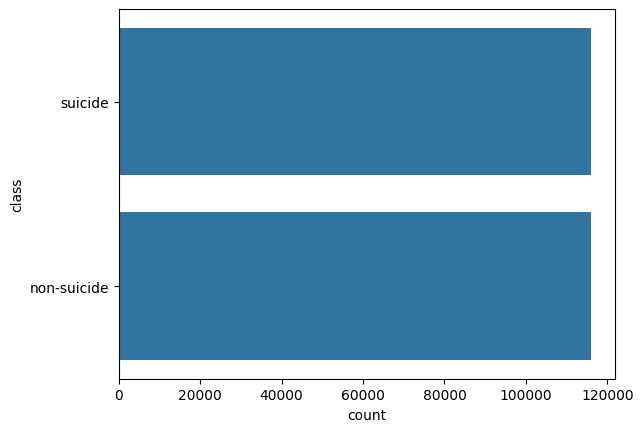

In [9]:
sns.countplot(Suicide['class'])
plt.show()

In [10]:
Suicide['Length'] = Suicide['text'].apply(lambda x: len(x.split(' ')))
Suicide['Length'].describe()

count    232074.000000
mean        131.546438
std         222.081581
min           1.000000
25%          26.000000
50%          60.000000
75%         154.000000
max       15632.000000
Name: Length, dtype: float64

In [11]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Suicide['Length'].quantile(i))

15.0
22.0
30.0
42.0
60.0
86.0
126.0
190.0
317.0


In [12]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Suicide['Length'].quantile(i))

339.0
363.0
393.0
427.0
470.0
526.0
604.0
721.0
960.0


In [13]:
#Cutting off the post length at 317 words. 

In [14]:
Suicide = Suicide[Suicide.Length<=317]

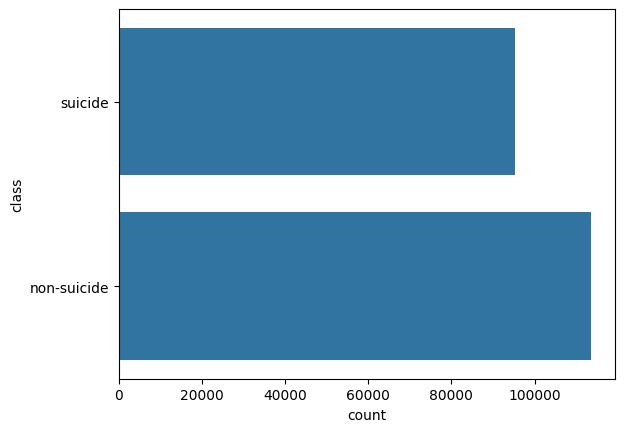

In [15]:
sns.countplot(Suicide['class'])
plt.show()

In [16]:
len(Suicide)

208955

In [17]:
#As we can see we still get a good distribution of the target class.

In [18]:
Words = list()
for i in Suicide['text']:
    for j in i.split(' '):
        Words.append(j.upper())
len(Words)

16688702

In [19]:
from collections import Counter

In [20]:
Words_Freq = Counter(Words)
Words_Freq = pd.DataFrame({'Word':list(Words_Freq.keys()),'Frequency':list(Words_Freq.values())})
Words_Freq.sort_values('Frequency',ascending=False,inplace=True)
Words_Freq.head(70)

,Word,Frequency
4,I,890895
18,TO,558762
16,AND,464789
90,THE,350903
30,A,339305
...,...,...
404,CAN'T,35968
296,HAD,35618
460,DON’T,35336
1328,I'VE,35261


In [21]:
len(Words_Freq)

428444

In [22]:
Words_Freq['Frequency'].describe()

count    428444.000000
mean         38.951886
std        2288.110751
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      890895.000000
Name: Frequency, dtype: float64

In [23]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(Words_Freq['Frequency'].quantile(i))

228.0
270.0
325.8989999999758
406.0
528.0
709.0
1035.0
1825.0
4104.140000000596


In [24]:
#Cutting off the words frequency at above 99 quantile and below 31905

In [25]:
Words_Freq = Words_Freq[Words_Freq['Frequency']>Words_Freq['Frequency'].quantile(0.99)]
len(Words_Freq)

4281

In [26]:
Words_Freq['Frequency'].describe()

count      4281.000000
mean       3504.923616
std       22625.909153
min         195.000000
25%         294.000000
50%         528.000000
75%        1378.000000
max      890895.000000
Name: Frequency, dtype: float64

In [27]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] < 31905]
Words_Freq.head()

,Word,Frequency
726,SOME,31882
145,ME.,31630
3986,FILLER,31016
1254,WE,30745
11,HAS,29485


In [28]:
len(Words_Freq)

4202

In [29]:
#We have to reduce the number of words for processing capacity. 

In [30]:
for i in [0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    print(Words_Freq['Frequency'].quantile(i))

19803.076999999972
20529.751999999964
21670.046999999926
22609.074000000095
24278.224999999984
25391.77599999999
26753.605999999985
27639.58599999999
29412.64000000032


In [31]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] >= 3615.8130000000237]
Words_Freq.tail()

,Word,Frequency
71,SUPPOSED,3718
117,HEAR,3711
2096,FRIENDS.,3684
3339,MOTHER,3668
2387,LOVED,3617


In [32]:
len(Words_Freq)

380

In [33]:
#We get a good list of words. However we might have to reduce this list further based on capacity. 

In [34]:
#We will create separate variables for each of these words based on their presence in the posts. 

In [35]:
Final_Words = list(Words_Freq.Word)
for i in Final_Words:
    Suicide[i] = Suicide['text'].apply(lambda x: 1 if i in x.upper().split(' ') else 0)
Suicide.drop('text',axis=1,inplace=True)
Suicide.head()

,class,Length,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
0,suicide,143,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,non-suicide,27,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,non-suicide,26,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,suicide,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,suicide,289,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Suicide['LEAST'].value_counts()

LEAST
0    203642
1      5313
Name: count, dtype: int64

In [37]:
Suicide['class'] = Suicide['class'].apply(lambda x: 1 if x == 'suicide' else 0)
Suicide.head()

,class,Length,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
0,1,143,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,27,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,26,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,289,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#EDA

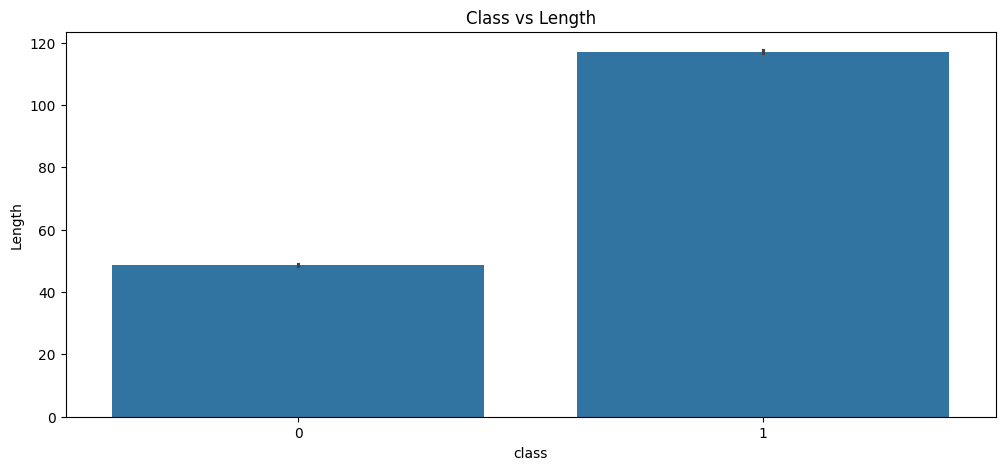

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(x='class',y='Length',data=Suicide)
plt.title('Class vs Length')
plt.show()

In [40]:
#Since there are a still quite a lot of words we will check only the words with the highest correlation with the target variable.

In [41]:
from scipy.stats import pearsonr

In [42]:
Correlations = dict()
var = list(Suicide.columns)
var.remove('class')
for i in var:
    Correlations[i] = pearsonr(Suicide[i],Suicide['class'])[0]
Correlations = pd.DataFrame({'Feature':list(Correlations.keys()),'Correlation':list(Correlations.values())})
Correlations.sort_values('Correlation',ascending=False,inplace=True)
Correlations.set_index('Feature')
Correlations.head(10)

,Feature,Correlation
0,Length,0.458362
23,KILL,0.309071
2,ME.,0.279329
63,SUICIDE,0.271519
37,END,0.257212
73,ANYMORE.,0.247672
47,LIVE,0.228209
119,MYSELF.,0.222832
13,IT.,0.222543
132,SUICIDAL,0.219771


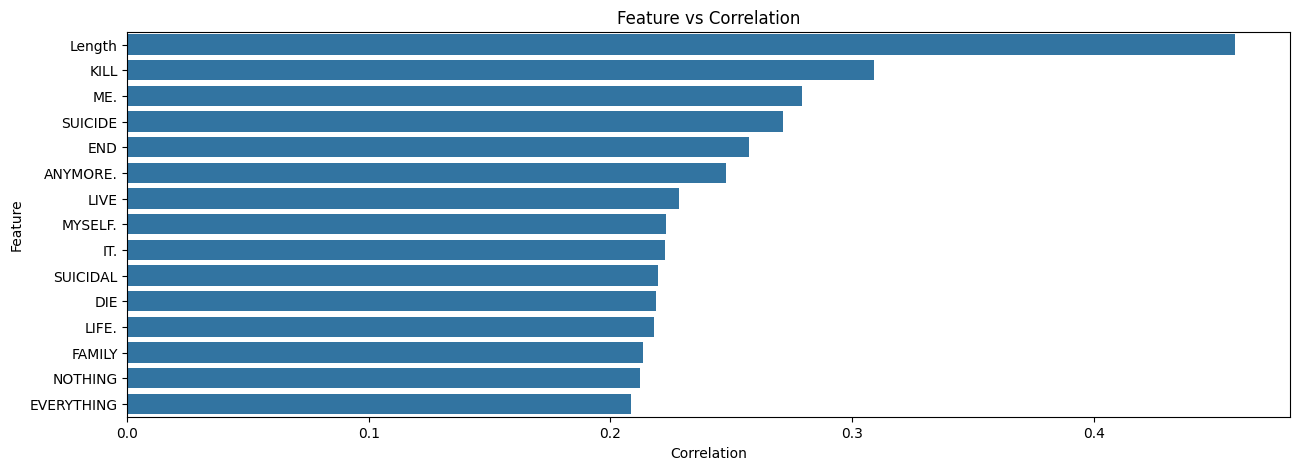

In [43]:
temp = Correlations.head(15)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()

In [44]:
#As we can see the correlations are not high considering the non linear relationship between the variables.

In [45]:
Correlations.tail(15)

,Feature,Correlation
106,WANNA,-0.029934
371,WEIRD,-0.031056
246,IDK,-0.032433
4,WE,-0.032647
230,US,-0.032701
344,CLASS,-0.047545
151,GIRL,-0.047838
281,REDDIT,-0.048870
270,KINDA,-0.054916
286,PLAY,-0.059581


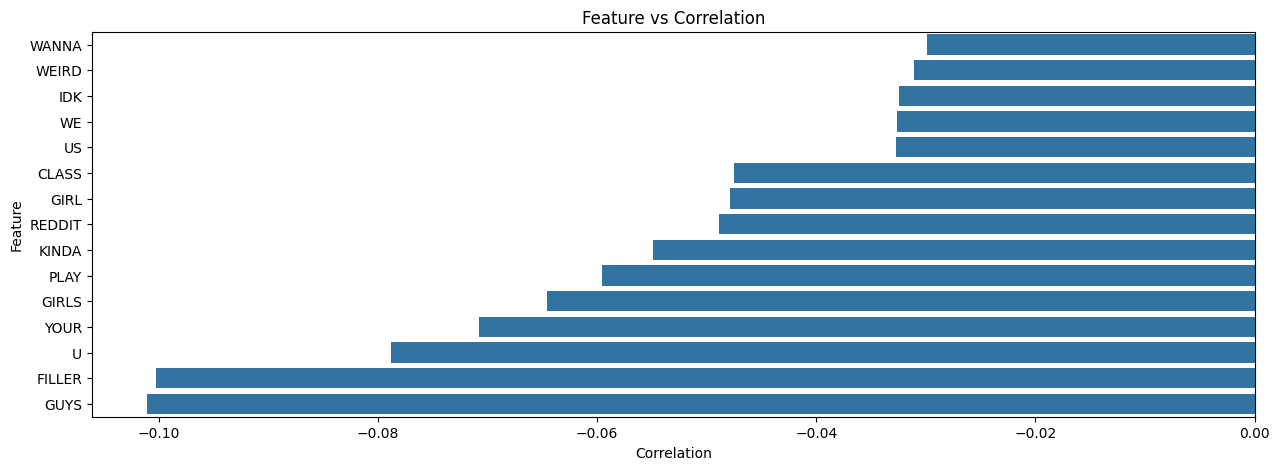

In [46]:
temp = Correlations.tail(15)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()

In [47]:
#here we get the highest negative correlations. 

In [48]:
#Model building.

In [49]:
#We will do this by taking a sample of the data for training and using the rest for prediction. 

In [50]:
#Also since we are mostly interested in the words we will drop the variable 'Length' for now.

In [51]:
Suicide_Pred = Suicide.drop('Length',axis=1)

In [52]:
len(Suicide_Pred)

208955

In [53]:
Suicide_Pred.head()

,class,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,ANY,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = Suicide_Pred.drop('class',axis=1)
y = Suicide_Pred['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.01,random_state=100)
X_train.head()

,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,ANY,MORE,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
15131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153315,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
115407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85559,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
len(X_train)

2089

In [57]:
#Checking the class distirbution of the train set.

In [58]:
y_train.value_counts()

class
0    1172
1     917
Name: count, dtype: int64

In [59]:
#As we can see we get a balanced data set. 

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [61]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1)

params = {'n_estimators':[200],
          'max_depth':[3,5,10,12,15,17,20],
          'max_features':[0.1,0.15,0.2,0.25,0.3],
          'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 12, 15, 17, 20],
                         'max_features': [0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [62]:
Model_best = grid_search.best_estimator_

In [63]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print('Train accuracy score :',accuracy_score(y_train,y_train_pred))
print('Test accuracy score :',accuracy_score(y_test,y_test_pred))
print('Train recall score :',recall_score(y_train,y_train_pred))
print('Test recall score :',recall_score(y_test,y_test_pred))

Train accuracy score : 0.9305887984681666
Test accuracy score : 0.8374841684955479
Train recall score : 0.8451472191930207
Test recall score : 0.767300992258898


In [64]:
Feature_Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_Importance.sort_values(by='Importance',ascending=False,inplace=True)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head()

,Importance
Feature,
SUICIDE,0.066679
KILL,0.063625
ME.,0.042326
END,0.033182
SUICIDAL,0.026878


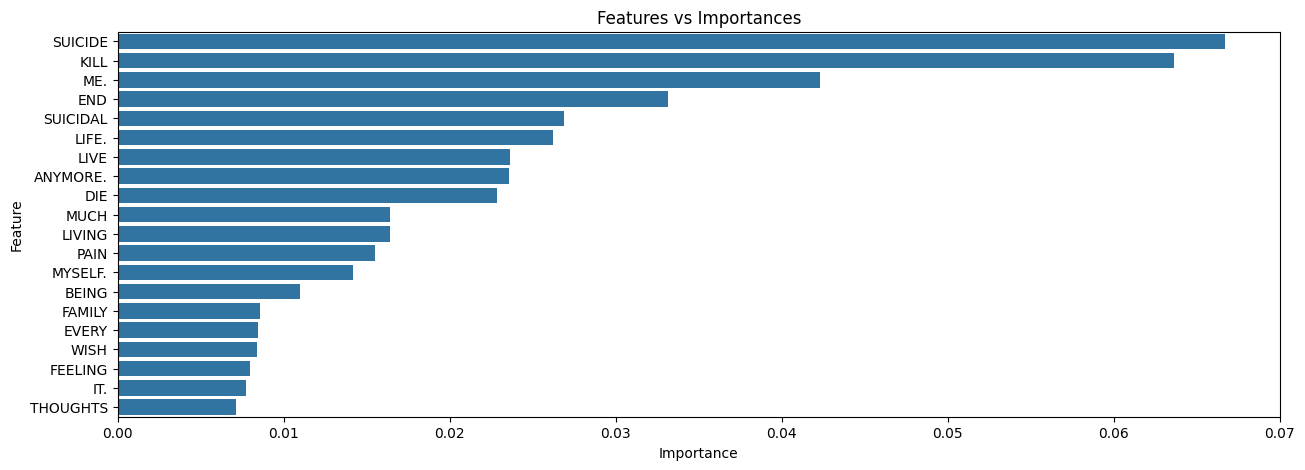

In [65]:
temp = Feature_Importance.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Importance,y=temp.index)
plt.title('Features vs Importances')
plt.show()

In [66]:
#We can also obtain the words/variables with the lowest importances

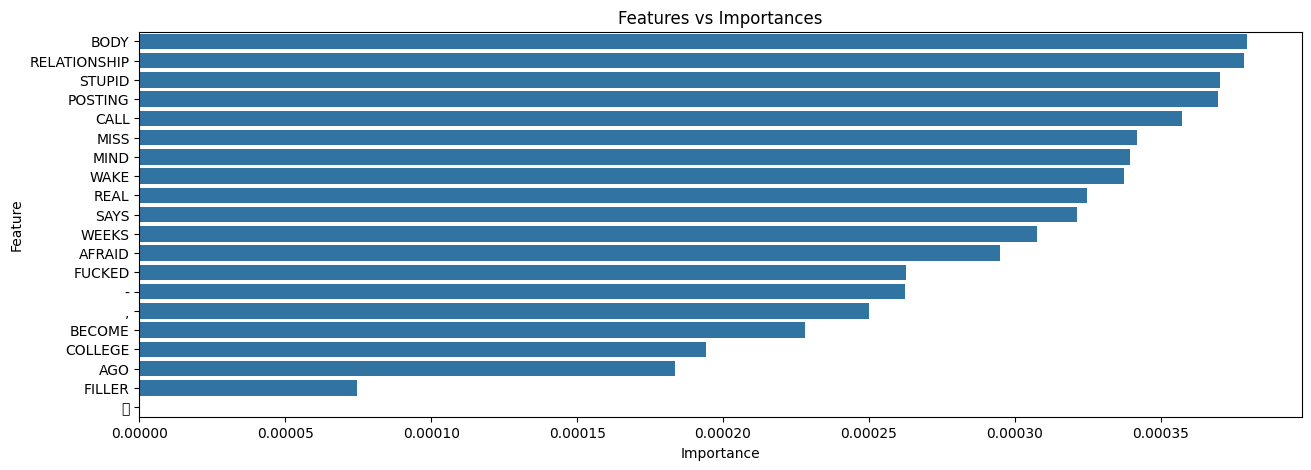

In [67]:
temp = Feature_Importance.tail(20)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Importance,y=temp.index)
plt.title('Features vs Importances')
plt.show()

In [68]:
#As we can see the model overfits the data slightly. However relative to the amount of data used for training and testing the 
#model has performed well. We can improve the scores by further HP tuning. 

In [69]:
#Now we will include the Length variable as well in our model. 

In [70]:
X = Suicide.drop('class',axis=1)
y = Suicide['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.01,random_state=100)
X_train.head()

,Length,SOME,ME.,FILLER,WE,HAS,FUCKING,WHY,BEING,ANY,...,WEIRD,WHAT'S,LONGER,OTHERS,THANK,SUPPOSED,HEAR,FRIENDS.,MOTHER,LOVED
15131,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153315,274,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115407,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189274,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85559,37,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [72]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1)

params = {'n_estimators':[200],
          'max_depth':[3,5,10,12,15,17,20],
          'max_features':[0.1,0.15,0.2,0.25,0.3],
          'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 12, 15, 17, 20],
                         'max_features': [0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [73]:
Model_best = grid_search.best_estimator_

In [74]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print('Train accuracy score :',accuracy_score(y_train,y_train_pred))
print('Test accuracy score :',accuracy_score(y_test,y_test_pred))
print('Train recall score :',recall_score(y_train,y_train_pred))
print('Test recall score :',recall_score(y_test,y_test_pred))

Train accuracy score : 0.9377692675921494
Test accuracy score : 0.8369185849777151
Train recall score : 0.8582333696837514
Test recall score : 0.7758680941639927


In [75]:
Feature_Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_Importance.sort_values(by='Importance',ascending=False,inplace=True)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head()

,Importance
Feature,
Length,0.198716
SUICIDE,0.069252
KILL,0.060520
ME.,0.041317
END,0.027419


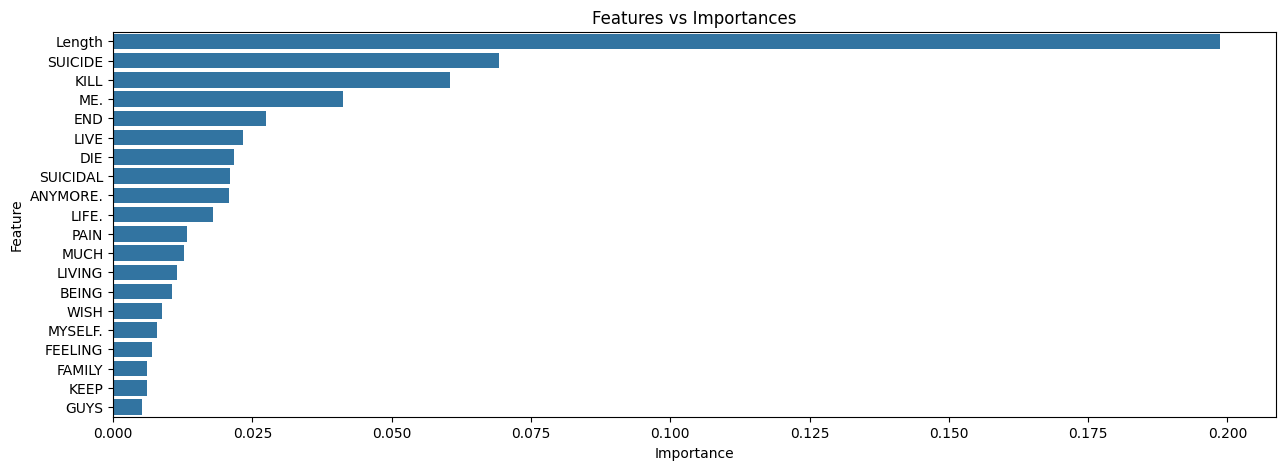

In [76]:
temp = Feature_Importance.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Importance,y=temp.index)
plt.title('Features vs Importances')
plt.show()

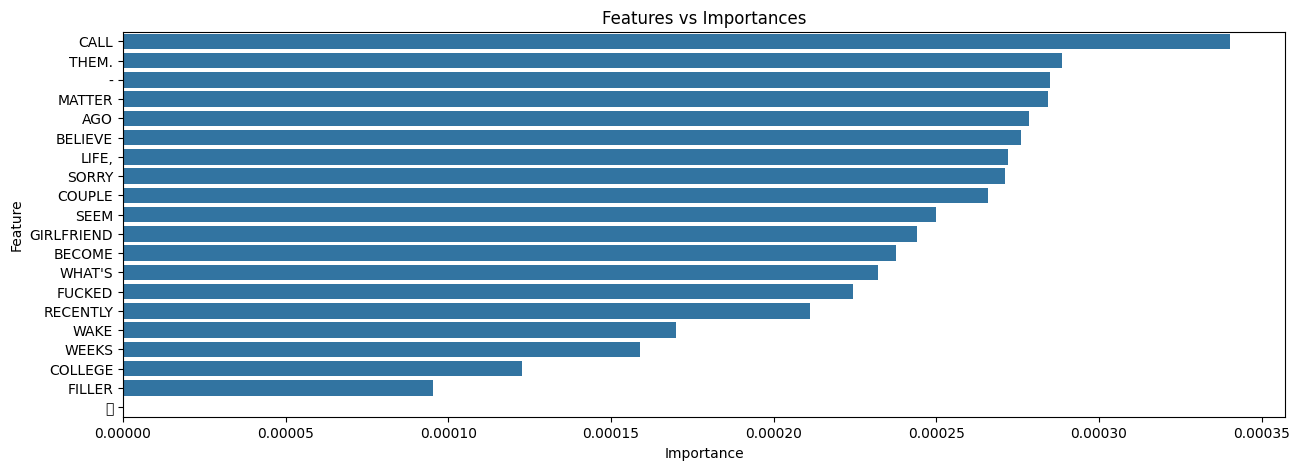

In [77]:
temp = Feature_Importance.tail(20)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Importance,y=temp.index)
plt.title('Features vs Importances')
plt.show()

In [78]:
#We get similar scores to the previous model that involve a bit of overfitting. 